In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rnd
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm

## Ejemplo 1

Geométrica: $\hat{p} = \frac{1}{\bar{X_n}}$

El estimador MV y de momentos da p_gorro = 0.111731843575419
El valor verdadero es p = 0.1


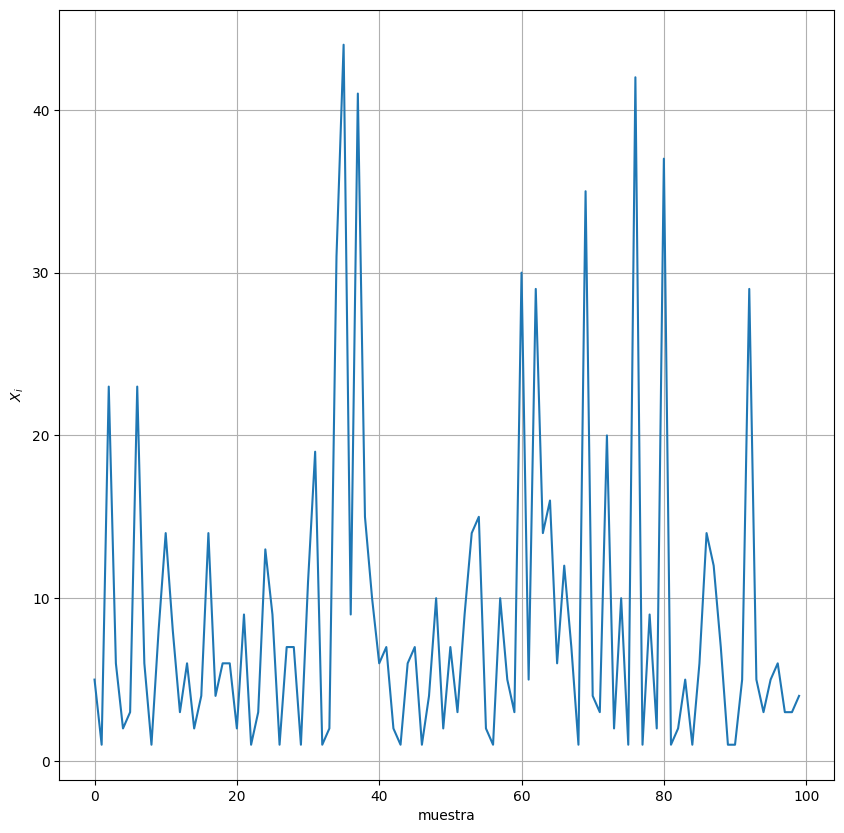

In [2]:
#Parámetros
p = 0.1
n = 100

#Muestra aleatoria:
muestras = np.empty(n)
for i in range(n): #Se hacen n iteraciones del proceso de la geométrica
  exito = 0
  k = 0
  while exito==0:
    exito = rnd.binomial(1, p) #Binomial de n=1 ~ Bernoulli
    k += 1 #incremento contador
  muestras[i] = k

#Estimación
p_hat = 1/(muestras.mean()) #p = 1/promedio
print('El estimador MV y de momentos da p_gorro =', p_hat)
print('El valor verdadero es p =', p)

#Gráfica de resultados
plt.figure(figsize=(10,10))
plt.plot(muestras)
plt.grid(True)
plt.ylabel('$X_i$')
plt.xlabel('muestra')
plt.show()

##Ejemplo 2

Uniforme:
$$ \hat{a}_{Mom} = \hat{M_1} - \frac{\sqrt{12\left(\hat{M2}-\hat{M1}^2\right)}}{2}, \quad
\hat{b}_{Mom} = \hat{M_1} + \frac{\sqrt{12\left(\hat{M2}-\hat{M1}^2\right)}}{2}  $$


$$ \hat{a}_{MV} = min\{X_1, ..., X_n \}, \quad
\hat{b}_{MV} = max\{X_1, ..., X_n \} $$

In [3]:
def estimador_momentos(X):
  m1_hat = X.mean()
  m2_hat = (X**2).mean() #cada muestra al cuadrado, y luego toma el promedio
  sigma2 = 12*(m2_hat-m1_hat**2)
  a_hat = m1_hat - np.sqrt(sigma2)/2
  b_hat = m1_hat + np.sqrt(sigma2)/2
  return a_hat, b_hat

def estimador_mv(X):
  a_hat = np.min(X)
  b_hat = np.max(X)
  return a_hat, b_hat

Estimador de momentos: a_gorro=0.7184172233018895, b_gorro=4.887853048935207
Estimador de máxima verosimilitud: a_gorro=1.0369849987849213, b_gorro=4.999132159253628
Valores verdaderos: a=1, b=5


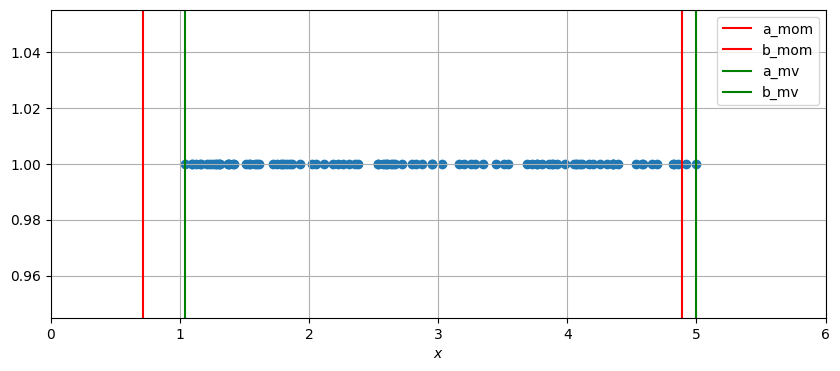

In [4]:
#Parámetros
a = 1
b = 5
n = 100

#Muestra aleatoria
muestras = rnd.uniform(low=a, high=b, size=n)

#Estimador de momentos
a_hat_mom, b_hat_mom = estimador_momentos(muestras)

#Estimador de maxima verosimilitud
a_hat_mv, b_hat_mv = estimador_mv(muestras)

print(f'Estimador de momentos: a_gorro={a_hat_mom}, b_gorro={b_hat_mom}')
print(f'Estimador de máxima verosimilitud: a_gorro={a_hat_mv}, b_gorro={b_hat_mv}')
print(f'Valores verdaderos: a={a}, b={b}')

#Gráfica de resultados
plt.figure(figsize=(10,4))
plt.scatter(muestras, np.ones(n))
plt.axvline(a_hat_mom, c='r', label='a_mom')
plt.axvline(b_hat_mom, c='r', label='b_mom')
plt.axvline(a_hat_mv, c='g', label='a_mv')
plt.axvline(b_hat_mv, c='g', label='b_mv')
plt.legend()
plt.grid(True)
plt.xlim(a-1,b+1)
plt.xlabel('$x$')
plt.show()

## Comparación de estimadores

$$ ECM = var + sesgo^2 $$

Curvas Experimentales:

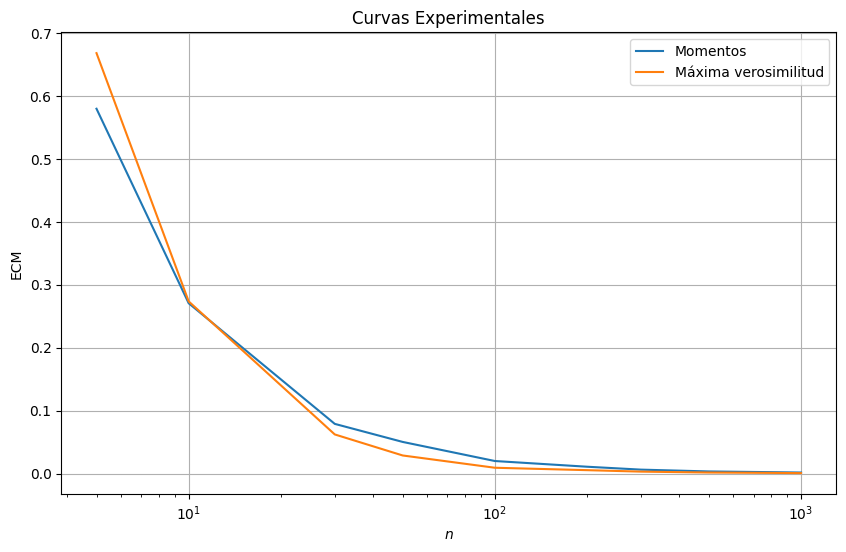

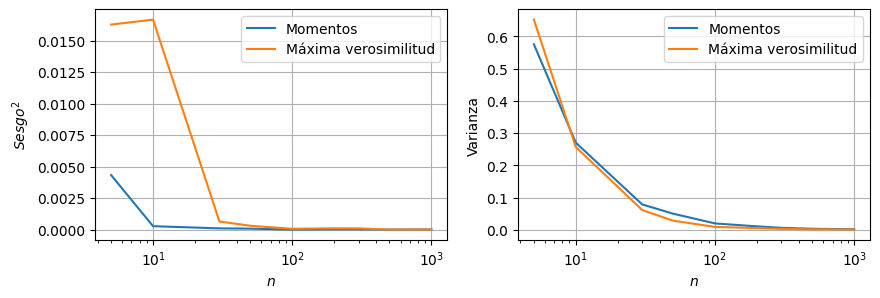

In [11]:
#Parámetros
n_s = [5, 10, 30, 50, 100, 200, 300, 500, 800, 1000]
M = 100
a=1
b=5

theta = np.array([a,b])

ecm_mom = np.empty(len(n_s))
sesgo_mom = np.empty(len(n_s))
var_mom = np.empty(len(n_s))
ecm_mv = np.empty(len(n_s))
sesgo_mv = np.empty(len(n_s))
var_mv = np.empty(len(n_s))

for i,n in enumerate(n_s):
  #M Muestras aleatorias
  muestras = rnd.uniform(low=a, high=b, size=(M,n))

  #Estimador de momentos
  m1_hat = muestras.mean(axis=1)
  m2_hat = (muestras**2).mean(axis=1) #cada muestra al cuadrado, y luego toma el promedio
  sigma2 = 12*(m2_hat-m1_hat**2)
  a_hats_mom = m1_hat - np.sqrt(sigma2)/2
  b_hats_mom = m1_hat + np.sqrt(sigma2)/2
  thetas_mom = np.vstack([a_hats_mom, b_hats_mom]).T

  #Estimador de maxima verosimilitud
  a_hats_mv, b_hats_mv = np.min(muestras, axis=1), np.max(muestras, axis=1)
  thetas_mv = np.vstack([a_hats_mv, b_hats_mom]).T

  #ECM
  ecm_mom[i] = ((thetas_mom-theta)**2).mean()
  ecm_mv[i] = ((thetas_mv-theta)**2).mean()

  #Sesgo
  sesgo_mom[i] = (thetas_mom - theta).mean()
  sesgo_mv[i] = (thetas_mv - theta).mean()

  #Varianza
  var_mom[i] = np.var(thetas_mom-theta)
  var_mv[i] = np.var(thetas_mv-theta)

#Gráfica de resultados
plt.figure(figsize=(10,6))
plt.title('Curvas Experimentales')
plt.plot(n_s, ecm_mom, label='Momentos')
plt.plot(n_s, ecm_mv, label='Máxima verosimilitud')
plt.grid(True)
plt.legend()
plt.xlabel('$n$')
plt.ylabel('ECM')
plt.xscale('log') #mejor visualización
plt.show()

fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(n_s, sesgo_mom**2, label='Momentos')
ax[0].plot(n_s, sesgo_mv**2, label='Máxima verosimilitud')
ax[0].set_xlabel('$n$')
ax[0].set_ylabel('$Sesgo^2$')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].grid(True)
ax[1].plot(n_s, var_mom, label='Momentos')
ax[1].plot(n_s, var_mv, label='Máxima verosimilitud')
ax[1].set_xlabel('$n$')
ax[1].set_ylabel('Varianza')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].grid(True)
plt.show()

Curvas Teóricas:

$$ sesgo(\hat{\theta}_{mom}) = 0, \quad ECM(\hat{\theta}_{mom}) = var(\hat{\theta}_{mom}) = \frac{\theta^2}{3n} $$

$$ sesgo(\hat{\theta}_{mv}) = -\frac{n}{n+1}\theta, \quad var(\hat{\theta}_{mv}) = \theta^2\frac{n}{(n+1)^2(n+2)} $$

$$ ECM(\hat{\theta}_{mv}) = \theta^2\frac{2}{(n+1)(n+2)} $$

**Observación** A pesar de que $\hat{\theta}_{mom}$ es insesgado su $ECM$ decrece como $1/n$, mientras que $\hat{\theta}_{mv}$ es sesgado pero su $ECM$ decrece como $1/n^2$

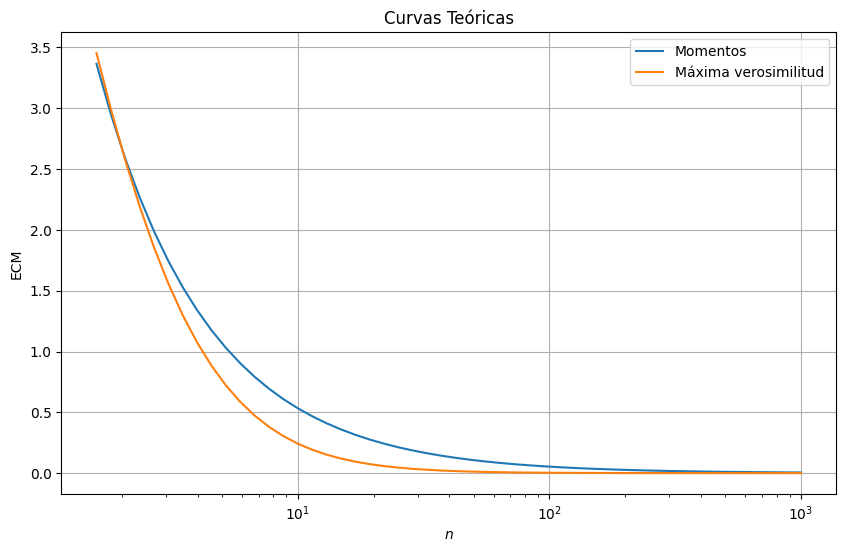

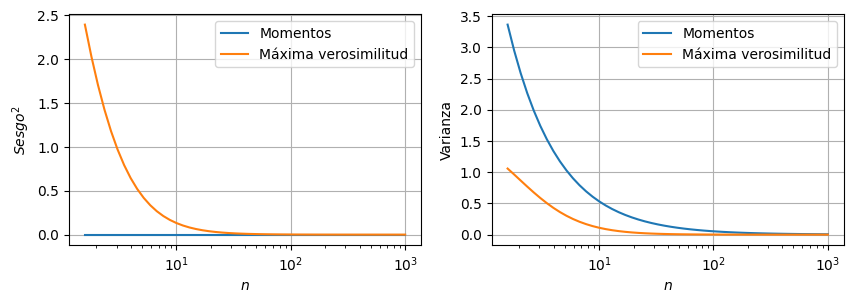

In [13]:
#Parámetros
ns = np.logspace(0.2,3)
a=1
b=5

theta = b-a

#Curvas teóricas
ecm_mom = theta**2/(3*ns)
sesgo_mom = np.zeros(len(ns))
var_mom = theta**2/(3*ns)

ecm_mv = (theta**2)*2/((ns+2)*(ns+1))
sesgo_mv = -theta/(ns+1)
var_mv = (theta**2)*ns/((ns+2)*(ns+1)**2)

#Gráfica de resultados
plt.figure(figsize=(10,6))
plt.title('Curvas Teóricas')
plt.plot(ns, ecm_mom, label='Momentos')
plt.plot(ns, ecm_mv, label='Máxima verosimilitud')
plt.grid(True)
plt.legend()
plt.xlabel('$n$')
plt.ylabel('ECM')
plt.xscale('log') #mejor visualización
plt.show()

fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(ns, sesgo_mom**2, label='Momentos')
ax[0].plot(ns, sesgo_mv**2, label='Máxima verosimilitud')
ax[0].set_xlabel('$n$')
ax[0].set_ylabel('$Sesgo^2$')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].grid(True)
ax[1].plot(ns, var_mom, label='Momentos')
ax[1].plot(ns, var_mv, label='Máxima verosimilitud')
ax[1].set_xlabel('$n$')
ax[1].set_ylabel('Varianza')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].grid(True)
plt.show()